## Описание проекта

Необходимо подготовить прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.
Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В нашем распоряжении данные с параметрами добычи и очистки.
Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

## 1. Изучение и подготовка данных из файла

### 1.1 Первое знакомство с данными

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from sklearn import *
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle
from sklearn.metrics import mean_absolute_error
from scipy import stats as st
from scipy.stats import t
import seaborn as sns
from sklearn.metrics import make_scorer, r2_score
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.datasets import make_regression
from sklearn.dummy import DummyRegressor

Изучим имеющиеся исходные данные, а также данные для обучающей и тестовой выборок:

In [6]:
try:
    df_full = pd.read_csv("C:/Users/dimil/OneDrive/Desktop/gold_recovery_full_new.csv")
except:
    df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

df_full.head(10)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


In [7]:
df_full.describe().T

,count,mean,std,min,25%,50%,75%,max
final.output.concentrate_ag,19438.0,5.168470,1.372348,0.000000,4.251240,5.066094,5.895527,16.001945
final.output.concentrate_pb,19438.0,9.978895,1.669240,0.000000,9.137262,10.102433,11.035769,17.031899
final.output.concentrate_sol,19228.0,9.501224,2.787537,0.000000,7.722820,9.218961,10.947813,19.615720
final.output.concentrate_au,19439.0,44.076513,5.129784,0.000000,43.402215,45.011244,46.275313,52.756638
final.output.recovery,19439.0,67.050208,10.125840,0.000000,63.299712,68.172738,72.686642,100.000000
...,...,...,...,...,...,...,...,...
secondary_cleaner.state.floatbank5_a_level,19438.0,-488.684065,34.533396,-797.323986,-500.458467,-499.802605,-498.384187,-244.483566
secondary_cleaner.state.floatbank5_b_air,19438.0,12.198224,5.333024,0.528083,8.971105,11.019433,14.019088,27.926001
secondary_cleaner.state.floatbank5_b_level,19438.0,-487.149827,38.347312,-800.220337,-500.129462,-499.935317,-499.436708,-137.740004
secondary_cleaner.state.floatbank6_a_air,19437.0,18.959024,5.550498,-0.079426,14.983037,19.960541,24.003170,32.188906


In [8]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [9]:
try:
    df_train = pd.read_csv("C:/Users/dimil/OneDrive/Desktop/gold_recovery_train_new.csv")
except:
    df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')

df_train.head(10)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


In [10]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
final.output.concentrate_ag,14148.0,5.142034,1.369586,0.000000,4.211620,4.994652,5.859540,16.001945
final.output.concentrate_pb,14148.0,10.132960,1.654930,0.000000,9.297355,10.297144,11.170603,17.031899
final.output.concentrate_sol,13938.0,9.202849,2.790516,0.000000,7.484645,8.845462,10.487508,18.124851
final.output.concentrate_au,14149.0,44.003792,4.905261,0.000000,43.276111,44.872436,46.166425,52.756638
final.output.recovery,14149.0,66.518832,10.295402,0.000000,62.545817,67.432775,72.346428,100.000000
...,...,...,...,...,...,...,...,...
secondary_cleaner.state.floatbank5_a_level,14148.0,-483.956022,37.892788,-797.142475,-500.363177,-499.702452,-487.712108,-275.073125
secondary_cleaner.state.floatbank5_b_air,14148.0,13.064590,5.765617,0.646208,8.994405,11.997547,17.982903,27.926001
secondary_cleaner.state.floatbank5_b_level,14148.0,-483.966564,39.207913,-800.006180,-500.105994,-499.914556,-453.186936,-157.396071
secondary_cleaner.state.floatbank6_a_air,14147.0,19.577539,5.764417,0.195324,14.989304,19.984175,24.991623,32.188906


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [12]:
try:
    df_test = pd.read_csv("C:/Users/dimil/OneDrive/Desktop/gold_recovery_test_new.csv")
except:
    df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')

df_test.head(10)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
5,2016-09-01 05:59:59,168.485085,8.817007,7.420000,0.791191,1402.826803,-499.299521,1401.511119,-499.205357,1404.088107,...,12.029797,-499.814895,8.036586,-500.371492,8.041446,-510.037054,4.983949,-499.990990,24.978973,-500.475640
6,2016-09-01 06:59:59,144.133440,7.924610,7.420000,0.788838,1398.252401,-499.748672,1393.255503,-499.195380,1396.738566,...,12.026296,-499.473127,8.027984,-500.983079,7.907340,-507.964971,5.010224,-500.043697,25.040709,-499.501984
7,2016-09-01 07:59:59,133.513396,8.055252,6.988000,0.801871,1401.669677,-501.777839,1400.754446,-502.514024,1400.465244,...,12.040911,-501.293852,8.020490,-499.185229,8.116897,-511.927561,5.036498,-500.149615,25.032580,-503.970657
8,2016-09-01 08:59:59,133.735356,7.999618,6.935000,0.789329,1402.358981,-499.981597,1400.985954,-496.802968,1401.168584,...,11.998184,-499.481608,8.012610,-500.896783,7.974422,-521.199104,5.061599,-499.791519,25.005063,-497.613716
9,2016-09-01 09:59:59,126.961069,8.017856,7.030000,0.805298,1400.816120,-499.014158,1399.975401,-499.570552,1401.871924,...,12.040725,-499.987743,7.989503,-499.750625,7.989710,-509.946737,5.068811,-499.293900,24.992741,-499.272255


In [13]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
primary_cleaner.input.sulfate,5286.0,174.839652,43.027080,2.566156e+00,147.121401,177.828489,208.125438,265.983123
primary_cleaner.input.depressant,5285.0,8.683596,3.072050,3.839482e-03,6.489555,8.052207,10.027764,40.000000
primary_cleaner.input.feed_size,5290.0,7.266339,0.610219,5.650000e+00,6.890000,7.250000,7.600000,15.500000
primary_cleaner.input.xanthate,5286.0,1.383803,0.643474,4.983673e-03,0.907623,1.197610,1.797819,4.102454
primary_cleaner.state.floatbank8_a_air,5290.0,1539.494325,116.797884,5.445860e-32,1498.935802,1585.129123,1602.076529,2103.103580
primary_cleaner.state.floatbank8_a_level,5290.0,-497.665883,19.952431,-7.953163e+02,-500.357298,-499.969164,-499.568951,-57.195404
primary_cleaner.state.floatbank8_b_air,5290.0,1545.174232,122.224588,6.647490e-32,1498.970993,1595.621798,1602.323545,1813.083671
primary_cleaner.state.floatbank8_b_level,5290.0,-500.273098,32.968307,-7.999970e+02,-500.703002,-500.028514,-499.293257,-142.527229
primary_cleaner.state.floatbank8_c_air,5290.0,1527.272362,122.538034,4.033736e-32,1473.229862,1549.594682,1601.143775,1715.053773
primary_cleaner.state.floatbank8_c_level,5290.0,-498.330680,21.964876,-7.999606e+02,-501.018117,-500.017711,-498.994130,-150.937035


In [14]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

После первичного анализа можно сделать вывод о том, что в данных наблюдается большое количество пропусков.

### 1.2. Проверка эффективности обогащения

Для проверки правильности расчета возьмем признак rougher.output.recovery. Выберем необходимые для этого признаки и напишем функцию:

In [15]:
def recovery(C,F,T):
    recovery_rate = (C*(F-T))/(F*(C-T))*100
    return recovery_rate
   
    


In [16]:
#Доля золота в концентрате после флотации/очистки:
C = df_full['rougher.output.concentrate_au']

In [17]:
#Доля золота в сырье/концентрате до флотации/очистки:
F = df_full['rougher.input.feed_au']

In [18]:
#Доля золота в отвальных хвостах после флотации/очистки:
T = df_full['rougher.output.tail_au']

In [19]:
recovery(C,F,T)

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
19434    89.574376
19435    87.724007
19436    88.890579
19437    89.858126
19438    89.514960
Length: 19439, dtype: float64

Рассчитаем MAE:

In [20]:
mean_absolute_error(df_full['rougher.output.recovery'], recovery(C,F,T))

9.678490154319586e-15

Получившееся значение выглядит довольно низким, что свидетельствует о правильности расчета эффективности обогащения.

### 1.3. Анализ отсутствующих признаков

In [21]:
missing_attributes = df_full.columns.difference(df_test.columns).tolist()

In [22]:
print(missing_attributes)

['final.output.concentrate_ag', 'final.output.concentrate_au', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_au', 'final.output.tail_pb', 'final.output.tail_sol', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol', 'rougher.calculation.au_pb_ratio', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'rougher.calculation.sulfate_to_au_concentrate', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_au', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.recovery', 'rougher.output.tail_ag', 'rougher.output.tail_au', 'rougher.output.tail_pb', 'rougher.output.tail

В тестовой выборке отсутствуют значения параметров отвальных хвостов на различных этапах очистки, а также расчетные характеристики на этапе флотации.

### 1.3. Предобработка данных

Поготовим обучающую и тестовую выборки для построения моделей.

В пункте 1.1 мы уже обратили внимание на наличие пропусков. По отдельным признакам количество пропусков довольно значительно. Проверим данные на наличие дубликатов.

In [23]:
df_full.duplicated().sum()

0

In [24]:
df_train.duplicated().sum()

0

In [25]:
df_test.duplicated().sum()

0

При построении моделей необходимо будет учитывать наличие пропусков и отсутствие ряда признаков у тесотовой выборки.

## 2. Анализ данных

### 2.1. Анализ изменения концентрации металлов (Au, Ag, Pb) на различных этапах очистки.

Изучим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. 

In [26]:
def concentration(concentr_au, concentr_ag, concentr_pb):
    print("Концентрация золота равна:",concentr_au.mean(),"\n","Концентрация серебра равна:", concentr_ag.mean(),"\n","Концентрация свинца равна:",concentr_pb.mean())

Исходное сырье:

In [27]:
concentration(df_full['rougher.input.feed_au'],df_full['rougher.input.feed_ag'],df_full['rougher.input.feed_pb'])

Концентрация золота равна: 8.266097326589135 
 Концентрация серебра равна: 8.7949274258147 
 Концентрация свинца равна: 3.598084975395446


После флотации:

In [28]:
concentration(df_full['rougher.output.concentrate_au'],df_full['rougher.output.concentrate_ag'],df_full['rougher.output.concentrate_pb'])

Концентрация золота равна: 19.772000139486334 
 Концентрация серебра равна: 11.994759359873452 
 Концентрация свинца равна: 7.606272313194984


После первичной очистки:

In [29]:
concentration(df_full['primary_cleaner.output.concentrate_au'], df_full['primary_cleaner.output.concentrate_ag'], df_full['primary_cleaner.output.concentrate_pb'])

Концентрация золота равна: 32.1194004078766 
 Концентрация серебра равна: 8.442408077719056 
 Концентрация свинца равна: 9.829529774200587


После всех этапов очистки:

In [30]:
concentration(df_full['final.output.concentrate_au'], df_full['final.output.concentrate_ag'], df_full['final.output.concentrate_pb'])

Концентрация золота равна: 44.076512941952664 
 Концентрация серебра равна: 5.168470373676826 
 Концентрация свинца равна: 9.978894911181714


Построим график:

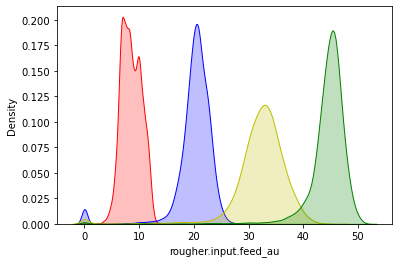

In [94]:
p1=sns.kdeplot(df_full['rougher.input.feed_au'], shade=True, color="r")
p1=sns.kdeplot(df_full['rougher.output.concentrate_au'], shade=True, color="b")
p1=sns.kdeplot(df_full['primary_cleaner.output.concentrate_au'], shade=True, color="y")
p1=sns.kdeplot(df_full['final.output.concentrate_au'], shade=True, color="g")


Концентрация золота существенно росла на каждым этапом очистки и в итоге достигла 44 тонн. Концентрация серебра после всех этапов очистки снизилась с 12 до 5 тонн, а концентрация свинца незначительно выросла - с 7.6 до 10 тонн.

### 2.2. Сравнение распределения гранул сырья

Изучим распределние гранул сырья в обучающей и тестовой выборках и сравним их между собой:

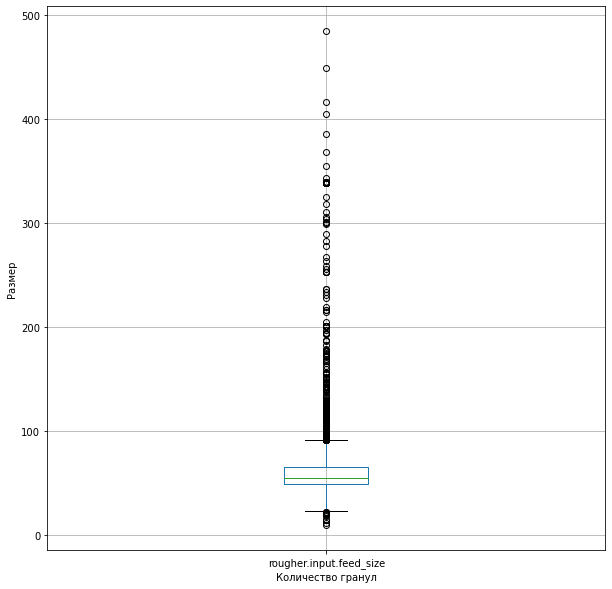

In [31]:
bplot_train = df_train.boxplot(column = 'rougher.input.feed_size',figsize=(10,10))
bplot_train.set_ylabel('Размер')
bplot_train.set_xlabel('Количество гранул')
plt.show()

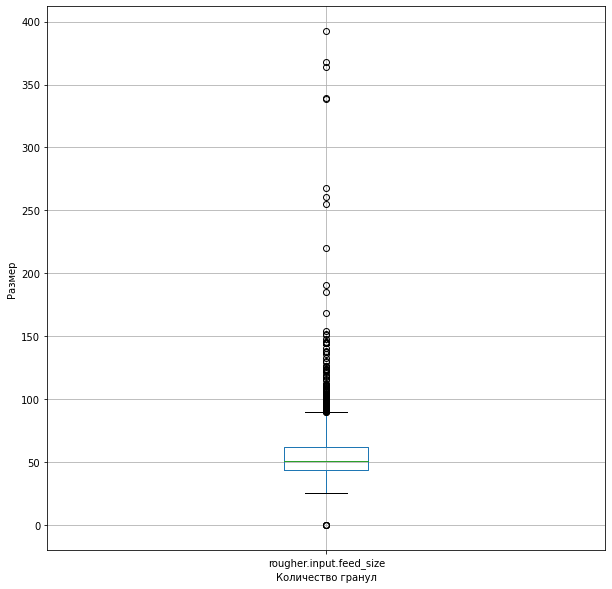

In [32]:
bplot_test = df_test.boxplot(column = 'rougher.input.feed_size',figsize=(10,10))
bplot_test.set_ylabel('Размер')
bplot_test.set_xlabel('Количество гранул')
plt.show()

Распределения схожи между собой, о чем свидетельствуют приблизительно равные значения средних и квартилий на графиках. При этом, в обучающей выборке гораздо больше экстремальных значений. 

### 2.3 Суммарная концентрация всех веществ на разных стадиях

Исследуем суммарную концентрацию всех веществ на разных стадиях и построим графики для анализа распределения и выбросов:

In [33]:
df_full['feed_concentration_sum'] = df_full['rougher.input.feed_au']+df_full['rougher.input.feed_ag']+df_full['rougher.input.feed_pb']
df_full['rougher_concentration_sum'] = df_full['rougher.output.concentrate_au']+df_full['rougher.output.concentrate_ag']+df_full['rougher.output.concentrate_pb'] 
df_full['primary_concentration_sum'] = df_full['primary_cleaner.output.concentrate_au']+df_full['primary_cleaner.output.concentrate_ag']+df_full['primary_cleaner.output.concentrate_pb']
df_full['final_concentration_sum'] = df_full['final.output.concentrate_au']+df_full['final.output.concentrate_ag']+df_full['final.output.concentrate_pb']

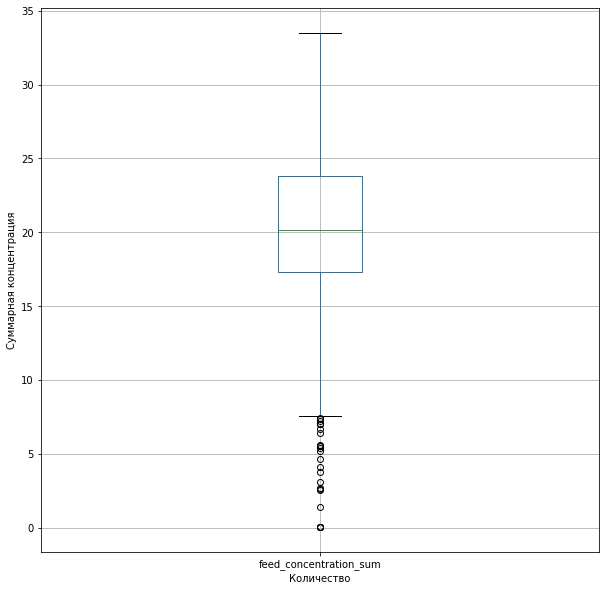

In [34]:
bplot_train = df_full.boxplot(column = 'feed_concentration_sum',figsize=(10,10))
bplot_train.set_ylabel('Суммарная концентрация')
bplot_train.set_xlabel('Количество')
plt.show()

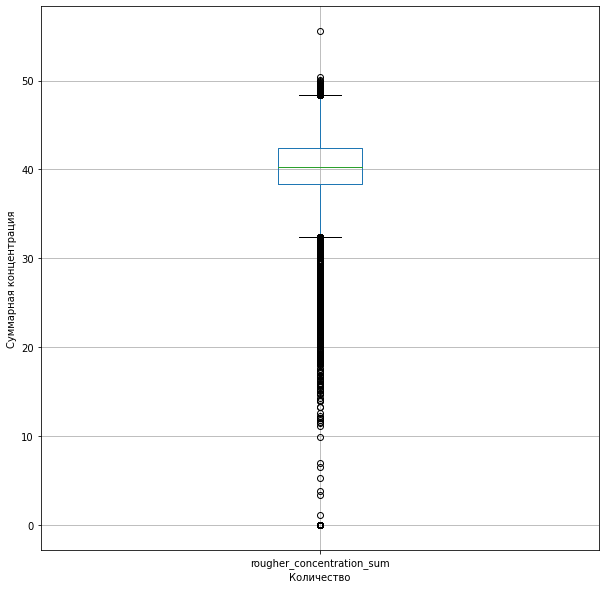

In [35]:
bplot_train = df_full.boxplot(column = 'rougher_concentration_sum',figsize=(10,10))
bplot_train.set_ylabel('Суммарная концентрация')
bplot_train.set_xlabel('Количество')
plt.show()

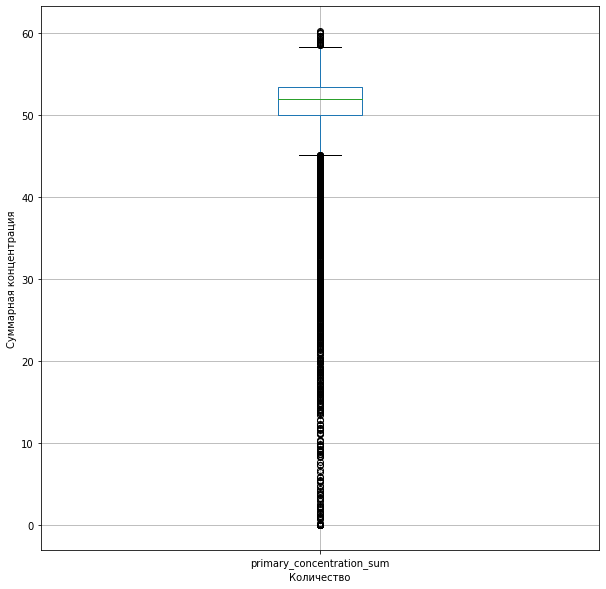

In [36]:
bplot_train = df_full.boxplot(column = 'primary_concentration_sum',figsize=(10,10))
bplot_train.set_ylabel('Суммарная концентрация')
bplot_train.set_xlabel('Количество')
plt.show()

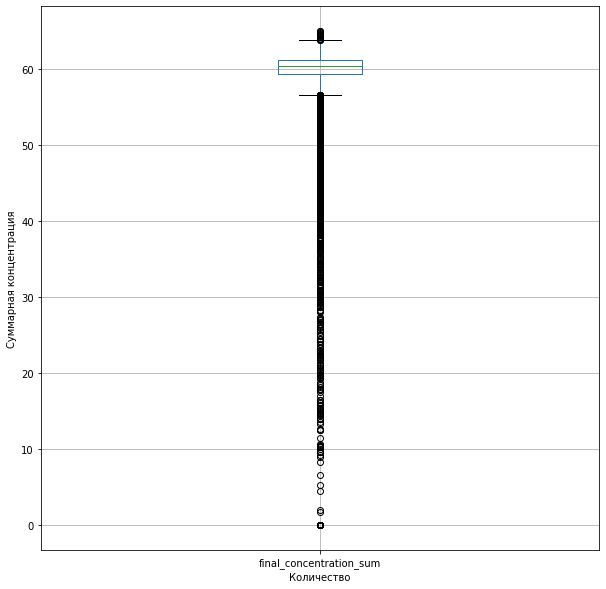

In [37]:
bplot_train = df_full.boxplot(column = 'final_concentration_sum',figsize=(10,10))
bplot_train.set_ylabel('Суммарная концентрация')
bplot_train.set_xlabel('Количество')
plt.show()

Видно, что на всех этапах очистки наблюдается большое количество выбросов, при этом с каждым этапом оно только увеличивается. Также есть некоторая доля нулевых значений.

## 3. Построение модели

### 3.1 Вычисление итоговой sMAPE

Напишем функцию для вычисления sMAPE:

In [40]:
def sMAPE(y_true, y_pred):
    error = abs(y_true - y_pred)
    scale = (abs(y_true) + abs(y_pred)) / 2
    result = (error / scale).mean()
    return result
 

def smapefinal(y_true, y_pred):
    y_true.reset_index(drop=True, inplace=True)
    y_pred = pd.DataFrame(data=y_pred)
    rougher = sMAPE(y_true.iloc[:, 0], y_pred.iloc[:, 0])
    final = sMAPE(y_true.iloc[:, 1], y_pred.iloc[:, 1])
    return 0.25 * rougher + 0.75 * final

### 3.2 Обучение модели

Удалим отсутствующие столбцы из обучающей выборки:

In [41]:
df_train.drop(missing_attributes, axis=1, inplace=True)

Добавим целевые признаки из полного датасета в обучающую и тестовую выборки. Предварительно создадим копии всех трех датасетов:

In [42]:
df_train_copy = df_train.copy(deep=True)
df_test_copy = df_test.copy(deep=True)
df_full_copy = df_full.copy(deep=True)

In [43]:
df_train = df_train.merge(df_full[['date', 'rougher.output.recovery', 'final.output.recovery']], how = 'left', on = 'date')
df_test = df_test.merge(df_full[['date', 'rougher.output.recovery', 'final.output.recovery']], how = 'left', on = 'date')

Удалим пропущенные значения:

In [44]:
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)
df_full.dropna(inplace=True)

Зададим необходимые признаки для обучающей и тестовой выборок:

In [45]:
target_train = df_train[['rougher.output.recovery','final.output.recovery']].reset_index(drop=True)
features_train = df_train.drop(['rougher.output.recovery','final.output.recovery','date'], axis = 1).reset_index(drop=True)
                            
target_test = df_test[['rougher.output.recovery','final.output.recovery']].reset_index(drop=True)
features_test = df_test.drop(['rougher.output.recovery','final.output.recovery','date'], axis = 1).reset_index(drop=True)



In [46]:
features_train.shape, features_test.shape

((12679, 52), (5229, 52))

In [47]:
target_test

,rougher.output.recovery,final.output.recovery
0,89.993421,70.273583
1,88.089657,68.910432
2,88.412756,68.143213
3,87.360133,67.776393
4,83.236367,61.467078
...,...,...
5224,95.172585,68.919891
5225,94.575036,68.440582
5226,93.018138,67.092759
5227,92.599042,68.061186


In [50]:
from sklearn.model_selection import cross_val_score

In [78]:
# ПРОСТО ДЛЯ ОЗНАКОМЛЕНИЯ ВАРИАНТА КРОСС-ВАЛИДАЦИИ СО СВОЕЙ ФУНКЦИЕЙ

random_state = 123
cv = 5
models = [DecisionTreeRegressor(random_state = random_state), 
          RandomForestRegressor(random_state=random_state), 
          LinearRegression()]


results_cross_val = []

for model in models: 
    
    scorer = make_scorer(smapefinal, greater_is_better=False) 
    
    cross_val_score_rougher = cross_val_score(model, 
                                              features_train, 
                                              target_train, 
                                              cv=cv, scoring=scorer).mean()
#    cross_val_score_final = cross_val_score(model, 
#                                            features_train, 
#                                            target_final_train, 
#                                            cv=cv, scoring=scorer).mean()

    results_cross_val.append({'model name': model.__class__.__name__, 
                              'cross_val_score': cross_val_score_rougher, 
                             })
                            #  'cross_val_score_final': cross_val_score_final 
              
pd.DataFrame(results_cross_val)

,model name,cross_val_score
0,DecisionTreeRegressor,-0.211729
1,RandomForestRegressor,-0.105118
2,LinearRegression,-0.109323


Посчитаем smape лучшей модели - случайного леса:

In [81]:
best_model = RandomForestRegressor(random_state=random_state)
best_model.fit(features_train,target_train)
predictions = best_model.predict(features_test)
smapefinal(target_test,predictions)

0.10355796709641421

Сравним результаты моделей с константным подходом:

In [56]:
dummy_regressor_rougher = DummyRegressor(strategy="median") 
dummy_regressor_rougher.fit(features_train, target_train.iloc[:, 0]) 
dummy_rougher_pred = dummy_regressor_rougher.predict(features_test) 
smape_dummy_rougher = sMAPE(target_test.iloc[:, 0], dummy_rougher_pred) 
print(smape_dummy_rougher)

0.08520413506592439


In [61]:
dummy_regressor_final = DummyRegressor(strategy="median") 
dummy_regressor_final.fit(features_train, target_train.iloc[:, 1]) 
dummy_final_pred = dummy_regressor_final.predict(features_test) 
smape_dummy_final = sMAPE(target_test.iloc[:, 1], dummy_final_pred) 
print(smape_dummy_final)

0.09265806486673553


In [74]:
smapefinal(target_test,(dummy_rougher_pred ,dummy_final_pred))

0.12280335753883599

Значение метрики smapefinal чуть ниже у моделей случайного леса и линейной регрессии.

## Общий вывод

В ходе работы был создан прототип модели машинного обучения для «Цифры». Проведенный анализ и построение моделей позволяет сделать следующие выводы:

1) Концентрация золота существенно росла на каждом этапе очистки и в итоге достигла 44 тонн. Концентрация серебра после всех этапов очистки снизилась с 12 до 5 тонн, а концентрация свинца незначительно выросла - с 7.6 до 10 тонн.   

2) Распределения размеров гранул в обучающей и тестовой выборках схожи между собой, о чем свидетельствуют приблизительно равные значения средних и квартилей на графиках. При этом, в обучающей выборке гораздо больше экстремальных значений. 

3) На всех этапах очистки наблюдается большое количество выбросов, при этом с каждым этапом оно только увеличивается. Также есть некоторая доля нулевых значений.

4) По итогам построения моделей, было рассчитано значение метрики smapefinal. После сравнения с константной моделью, можно сказать, что наилучшей моделью является алгоритм случайного леса.